<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [57]:
!pip3 install numpy pandas tensorflow keras seaborn nltk scikit-learn mlxtend wordcloud

In [58]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer


from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter

import re
import string

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, kurtosis

from collections import Counter
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jagadeesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jagadeesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "id", "date", "query", "username", "text"]

#### Five top records of data

In [60]:
data.head()

,label,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


#### Five last records of data

In [61]:
data.tail()

,label,id,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


#### Coloumns/features in data

In [62]:
data.columns

Index(['label', 'id', 'date', 'query', 'username', 'text'], dtype='object')

#### Length of data

In [63]:
print('lenght of data is', len(data))

lenght of data is 1599999


#### Shape of data

In [64]:
data.shape

(1599999, 6)

#### Data information

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#### Data types of all coloumns

In [66]:
data.dtypes

label        int64
id           int64
date        object
query       object
username    object
text        object
dtype: object

#### Checking Null values

In [67]:
np.sum(data.isnull().any(axis=1))

0

#### Rows and columns in the dataset

In [68]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [69]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   1599999


# Univariate Analysis

In [70]:
# Mean, Meadian, Mode of Tweet Length

data['tweet_length'] = data['text'].apply(len)

# Calculate mean, median, and mode for tweet length
mean_tweet_length = data['tweet_length'].mean()
median_tweet_length = data['tweet_length'].median()
mode_tweet_length = data['tweet_length'].mode().values[0]

print("Mean tweet length:", mean_tweet_length)
print("Median tweet length:", median_tweet_length)
print("Mode tweet length:", mode_tweet_length)

Mean tweet length: 74.09008568130355
Median tweet length: 69.0
Mode tweet length: 138


In [71]:
# Calculate standard deviation and variance for tweet length
std_dev_tweet_length = data['tweet_length'].std()
var_tweet_length = data['tweet_length'].var()

print("Standard Deviation of tweet length:", std_dev_tweet_length)
print("Variance of tweet length:", var_tweet_length)

Standard Deviation of tweet length: 36.44113578973038
Variance of tweet length: 1327.9563776455686


In [72]:
# Calculate skewness and kurtosis for tweet length
skewness_tweet_length = skew(data['tweet_length'])
kurtosis_tweet_length = kurtosis(data['tweet_length'])

print("Skewness of tweet length:", skewness_tweet_length)
print("Kurtosis of tweet length:", kurtosis_tweet_length)

Skewness of tweet length: 0.2710193073199834
Kurtosis of tweet length: -1.0200599286609988


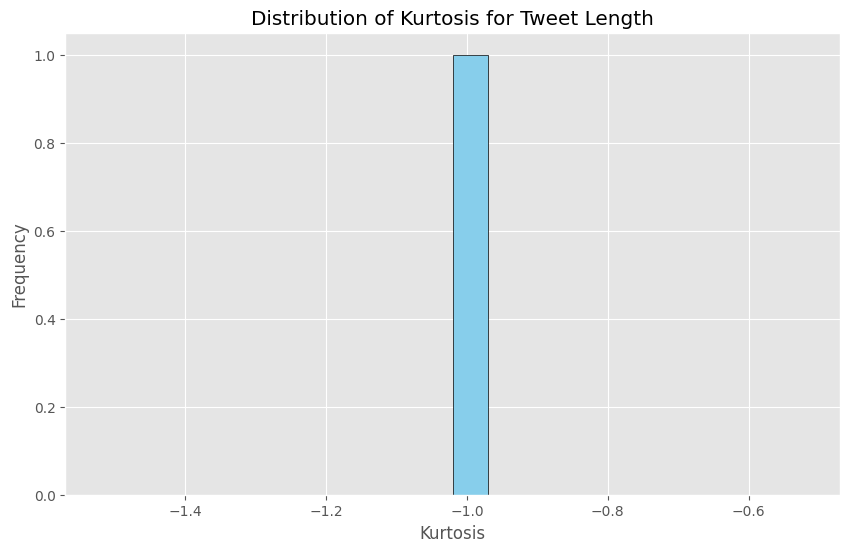

In [73]:
# Calculate kurtosis for tweet length
kurtosis_tweet_length = kurtosis(data['tweet_length'])

# Plot the histogram of kurtosis values
plt.figure(figsize=(10, 6))
plt.hist(kurtosis_tweet_length, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.title('Distribution of Kurtosis for Tweet Length')
plt.grid(True)
plt.show()

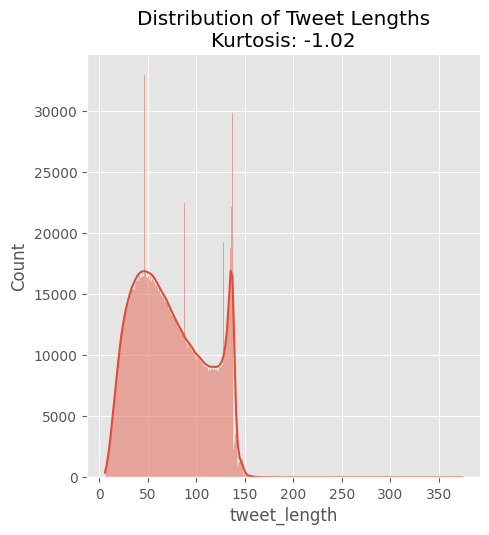

In [74]:
# Create a seaborn displot with a histogram of tweet lengths and kurtosis value
sns.displot(data['tweet_length'], kind='hist', kde=True)
plt.title(f'Distribution of Tweet Lengths\nKurtosis: {kurtosis_tweet_length:.2f}')
plt.show()

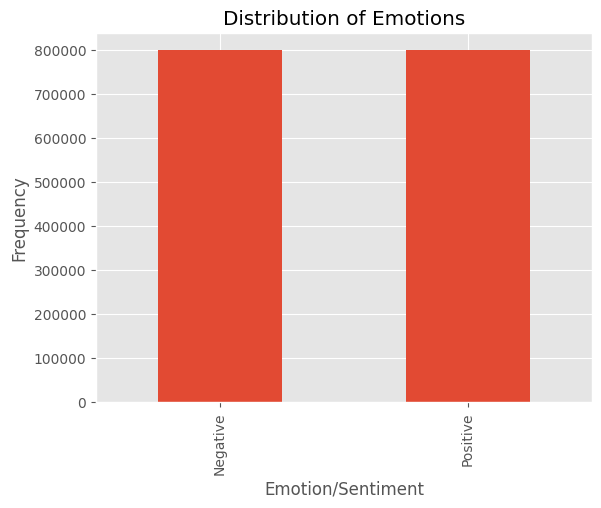

In [75]:
sentiment_counts = data['label'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion/Sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [76]:
unique_ids = data['id'].unique()
print("Number of unique IDs: ", len(unique_ids))

Number of unique IDs:  1598314


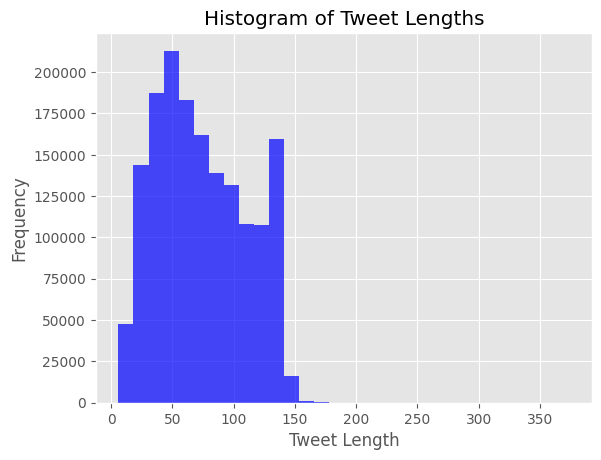

In [77]:
# Calculate the length of each tweet (number of characters)
data['tweet_length'] = data['text'].apply(len)

# Create a histogram for tweet lengths
plt.hist(data['tweet_length'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Histogram of Tweet Lengths')
plt.show()


# Bivaraite Analysis

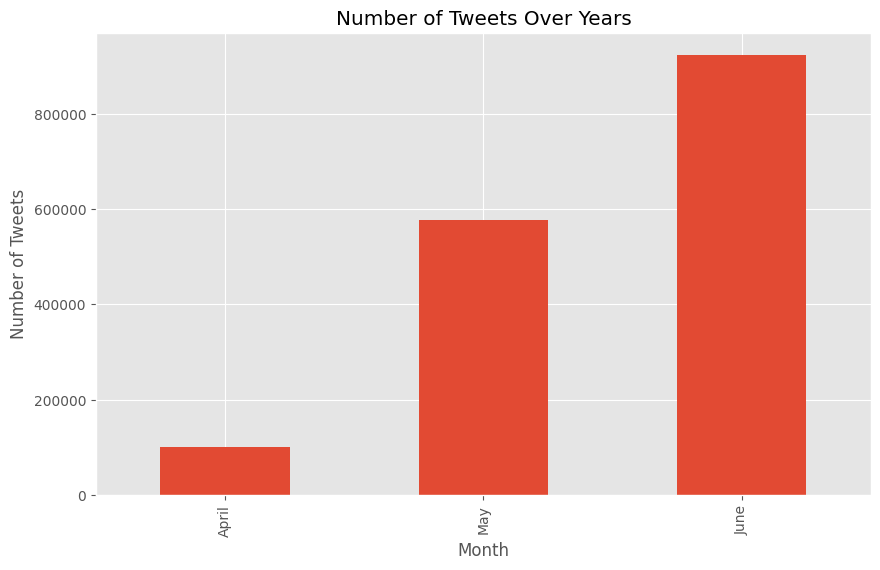

In [78]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
plt.figure(figsize=(10, 6))
data.groupby('month')['id'].count().plot(kind='bar')
plt.title('Number of Tweets Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks([0, 1, 2], ['April', 'May', 'June'])
plt.show()


#### Scatterplot of tweet length

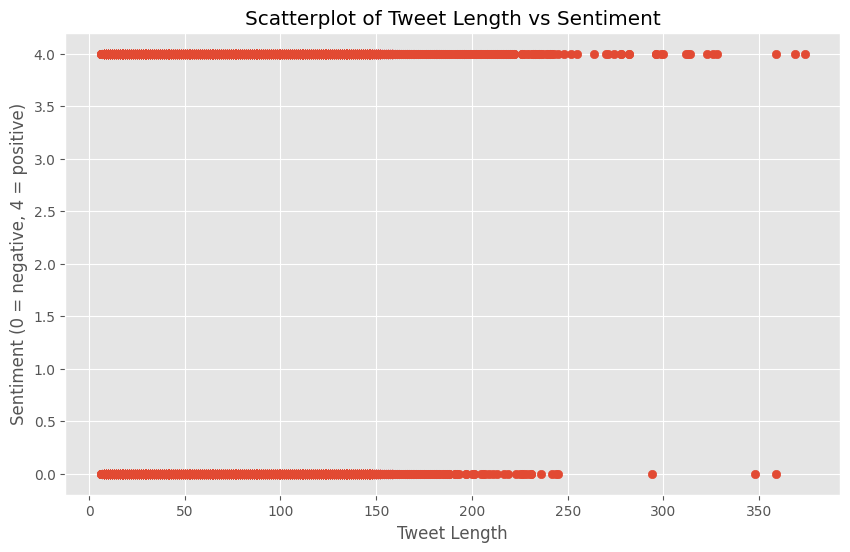

In [79]:
columns = ['label', 'id', 'date', 'query', 'username', 'text']
data['tweet_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(data['tweet_length'], data['label'], alpha=1)
plt.title('Scatterplot of Tweet Length vs Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment (0 = negative, 4 = positive)')
plt.grid(True)
plt.show()

#### Assigning Kedeplot

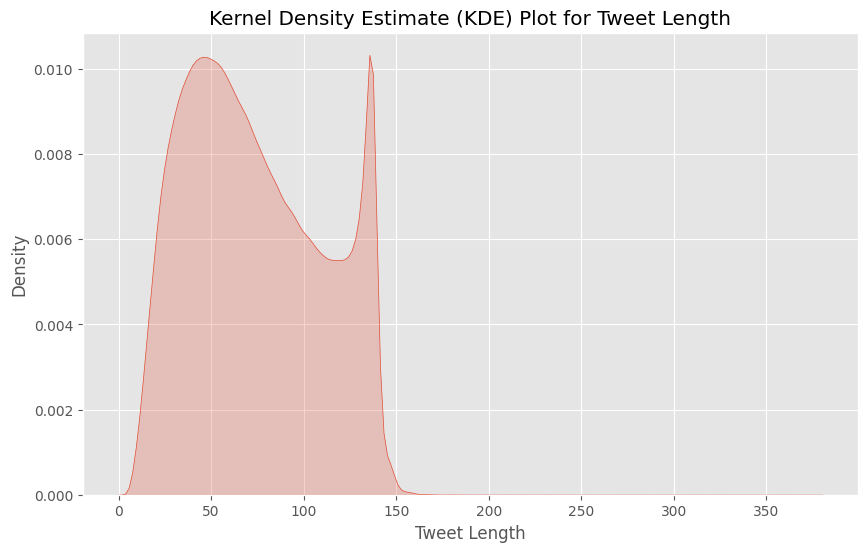

In [80]:
data['tweet_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.kdeplot(data['tweet_length'], shade=True)
plt.title('Kernel Density Estimate (KDE) Plot for Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.show()

# Multivariate

#### Pairplot

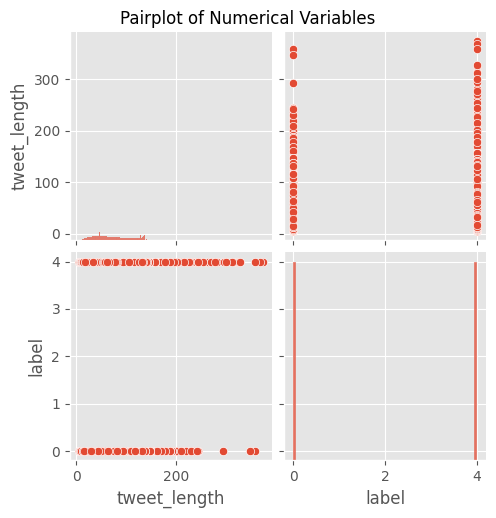

In [81]:
data['sentiment'] = data['label'].replace({0: 'negative', 4: 'positive'})
numerical_vars = ['tweet_length', 'label']
sns.pairplot(data[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

#### Heatmap for Most commonly used words

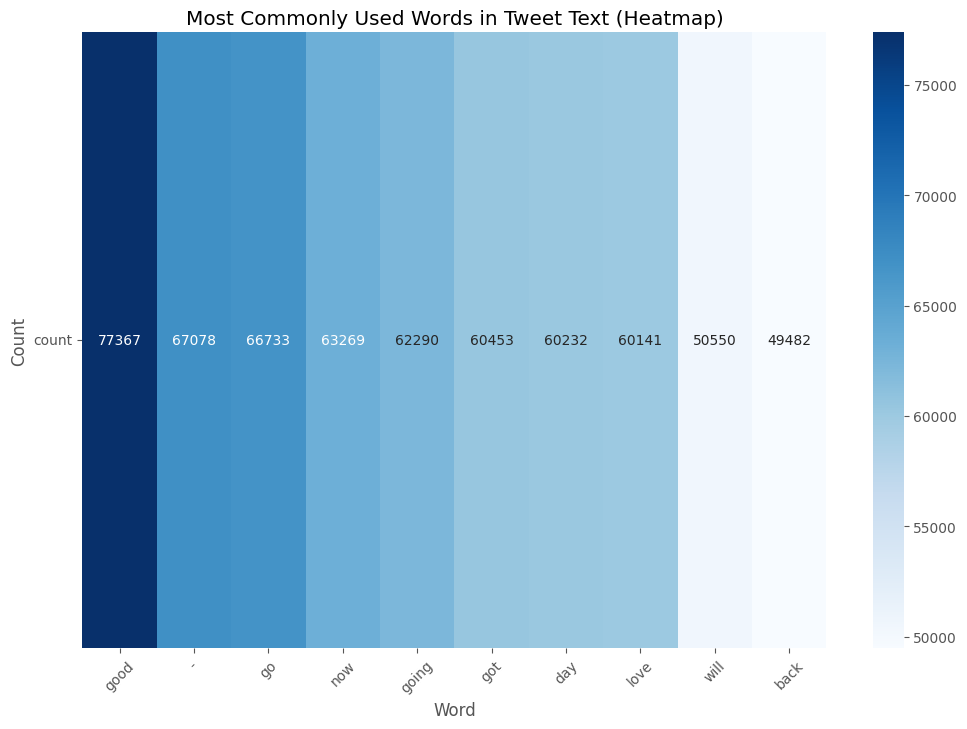

In [82]:

text_data = ' '.join(data['text'].values)

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['http', 'https', 'co', 'com', 'www'])

# Split the text into words and remove stopwords
words = [word for word in text_data.lower().split() if word not in custom_stopwords]

# Count the occurrences of each word
word_counts = Counter(words)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

# Sort the DataFrame by count in descending order
word_counts_df = word_counts_df.sort_values(by='count', ascending=False).head(10)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(word_counts_df.transpose(), cmap='Blues', annot=True, fmt='d')
plt.title('Most Commonly Used Words in Tweet Text (Heatmap)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [83]:
'''
def process_text(text):
    words = [word for word in text.lower().split() if word not in custom_stopwords]
    return words

# Apply text processing to tweet text
data['processed_text'] = data['text'].apply(process_text)

# Initialize counters for each sentiment category
negative_counter = Counter()
neutral_counter = Counter()
positive_counter = Counter()

# Update counters based on sentiment category
for index, row in data.iterrows():
    for word in row['processed_text']:
        if row['label'] == 0:
            negative_counter[word] += 1
        elif row['label'] == 2:
            neutral_counter[word] += 1
        elif row['label'] == 4:
            positive_counter[word] += 1

# Select the top N most common words for each sentiment category
top_words_negative = negative_counter.most_common(10)
top_words_neutral = neutral_counter.most_common(10)
top_words_positive = positive_counter.most_common(10)

# Create a DataFrame for visualization
word_counts_df = pd.DataFrame({
    'negative': dict(top_words_negative),
    'neutral': dict(top_words_neutral),
    'positive': dict(top_words_positive)
})

# Plot the word frequencies for each sentiment category
plt.figure(figsize=(12, 8))
sns.barplot(data=word_counts_df, orient='h')
plt.title('Top 10 Most Used Words in Tweet Text by Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.show()
'''

"\ndef process_text(text):\n    words = [word for word in text.lower().split() if word not in custom_stopwords]\n    return words\n\n# Apply text processing to tweet text\ndata['processed_text'] = data['text'].apply(process_text)\n\n# Initialize counters for each sentiment category\nnegative_counter = Counter()\nneutral_counter = Counter()\npositive_counter = Counter()\n\n# Update counters based on sentiment category\nfor index, row in data.iterrows():\n    for word in row['processed_text']:\n        if row['label'] == 0:\n            negative_counter[word] += 1\n        elif row['label'] == 2:\n            neutral_counter[word] += 1\n        elif row['label'] == 4:\n            positive_counter[word] += 1\n\n# Select the top N most common words for each sentiment category\ntop_words_negative = negative_counter.most_common(10)\ntop_words_neutral = neutral_counter.most_common(10)\ntop_words_positive = positive_counter.most_common(10)\n\n# Create a DataFrame for visualization\nword_count

In [85]:
def process_text(text):
    words = [word for word in text.lower().split() if word not in custom_stopwords]
    return words

# Apply text processing to tweet text
data['processed_text'] = data['text'].apply(process_text)

negative_counter = Counter()
neutral_counter = Counter()
positive_counter = Counter()

# Update counters based on sentiment category
for index, row in data.iterrows():
    for word in row['processed_text']:
        if row['label'] == 0:
            negative_counter[word] += 1
        elif row['label'] == 2:
            neutral_counter[word] += 1
        elif row['label'] == 4:
            positive_counter[word] += 1

# Select the top N most common words for each sentiment category
top_words_negative = dict(negative_counter.most_common(10))
top_words_neutral = dict(neutral_counter.most_common(10))
top_words_positive = dict(positive_counter.most_common(10))


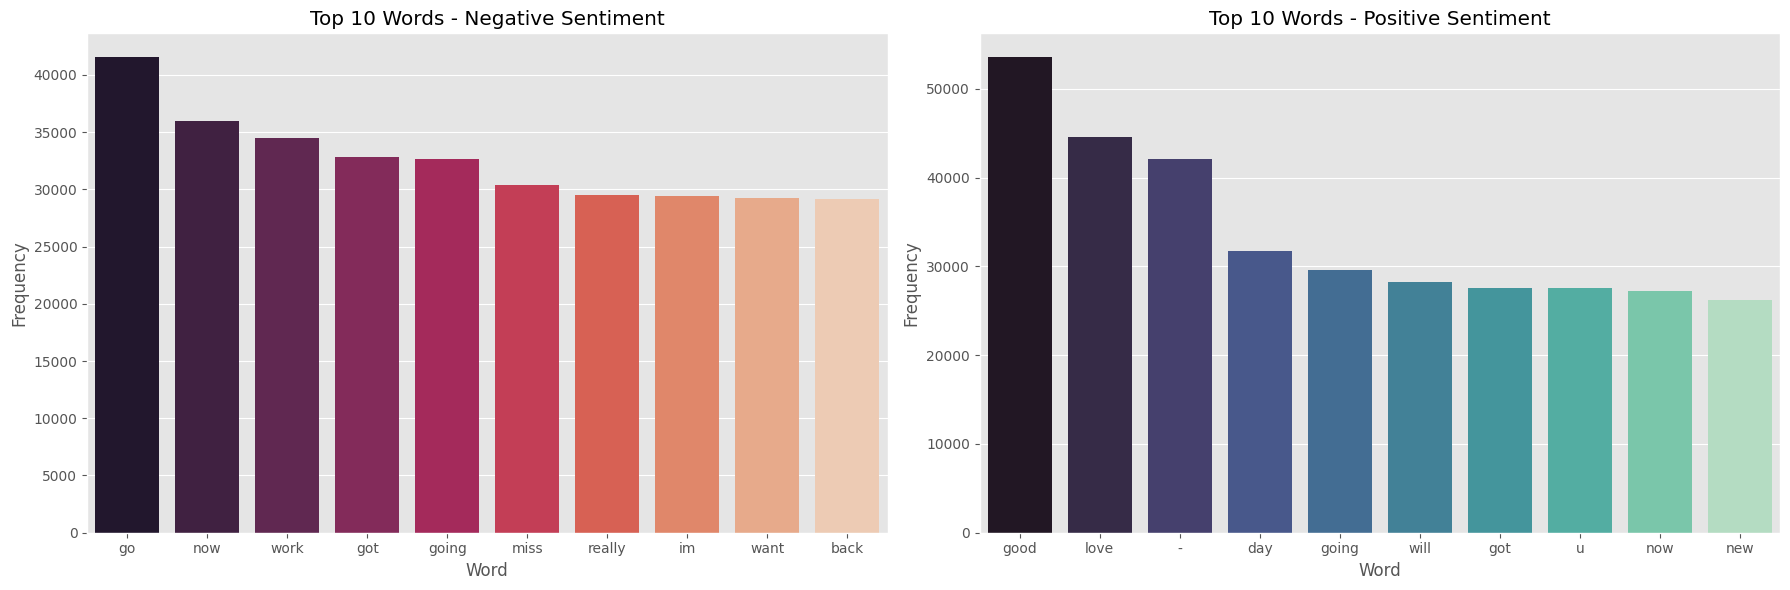

In [86]:
# Plot the word frequencies for each sentiment category
plt.figure(figsize=(18, 6))

# Plot for negative sentiment
plt.subplot(1, 2, 1)
sns.barplot(x=list(top_words_negative.keys()), y=list(top_words_negative.values()), palette='rocket')
plt.title('Top 10 Words - Negative Sentiment')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Plot for positive sentiment
plt.subplot(1, 2, 2)
sns.barplot(x=list(top_words_positive.keys()), y=list(top_words_positive.values()), palette='mako')
plt.title('Top 10 Words - Positive Sentiment')
plt.xlabel('Word')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">  
<h1><center><strong>Data Preparation 📝</strong></center></h1>
</div>

In [87]:
# Selecting the text and label coloumn
word_data = data[['text','label']]

# Assigning 1 to Positive sentment 4
word_data['label'][word_data['label']==4]=1

# Separating positive and negative tweets
data_pos = word_data[word_data['label'] == 1]
data_neg = word_data[word_data['label'] == 0]

# taking one fourth data so we can run on our machine easily 
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

# Combining positive and negative tweets
word_data = pd.concat([data_pos, data_neg])

# Making statement text in lower case
word_data['text'] = word_data['text'].str.lower()

word_data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

In [88]:
# Cleaning and removing Stop words of english
stopwords_list = stopwords.words('english')

", ".join(stopwords.words('english'))

# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
word_data['text'] = word_data['text'].apply(lambda text: cleaning_stopwords(text))
word_data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [89]:
# Cleaning and removing punctuations 
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

word_data['text'] = word_data['text'].apply(lambda x: cleaning_punctuations(x))
word_data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

In [90]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [91]:
word_data['text'] = word_data['text'].apply(lambda x: cleaning_repeating_char(x))
word_data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing email

In [92]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [93]:
word_data['text']= word_data['text'].apply(lambda x: cleaning_email(x))
word_data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing URL's

In [94]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [95]:
word_data['text'] = word_data['text'].apply(lambda x: cleaning_URLs(x))
word_data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [96]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [97]:
word_data['text'] = word_data['text'].apply(lambda x: cleaning_numbers(x))
word_data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

#### Getting tokenization of tweet text

In [98]:
tokenizer = RegexpTokenizer(r'\w+')
word_data['text'] = word_data['text'].apply(tokenizer.tokenize)

In [99]:
word_data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Stemming

In [100]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

word_data['text']= word_data['text'].apply(lambda x: stemming_on_text(x))

In [101]:
word_data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

#### Applying Lemmatizer

In [102]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

word_data['text'] = word_data['text'].apply(lambda x: lemmatizer_on_text(x))

In [103]:
word_data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [104]:
data = word_data

#### Separating input feature and label

In [105]:
X=data.text
y=data.label

#### Preparing the input features for training 
- We converting the text words into arrays form. 
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets. 

In [106]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [107]:
sequences_matrix.shape

(40000, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training 
- 30% tweets will be used to test the performance of the model.

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Models for training 🧪</strong></center></h2>   
</div>

# Naive Bayes Model:
Naive Bayes is a simple yet effective algorithm for classification tasks. We can use the Multinomial Naive Bayes implementation from scikit-learn for text classification.

In [109]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, Y_train)

# Evaluate the classifier
accuracy_nb = nb_classifier.score(X_test, Y_test)
print("Naive Bayes Model Accuracy:", accuracy_nb)


Naive Bayes Model Accuracy: 0.5176666666666667


# SVM Model:
Support Vector Machines (SVM) are powerful classifiers that can handle both linear and non-linear data. We'll use the scikit-learn implementation for SVM.

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, Y_train)

# Evaluate the classifier
accuracy_svm = svm_classifier.score(X_test, Y_test)
print("SVM Model Accuracy:", accuracy_svm)


# Linear Regression Model:

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' contains the loaded dataset

# Preprocessing the data
# For simplicity, let's assume 'label' is the target variable and 'text' is the feature
X = data['text']
y = data['label']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_vectorized, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test_vectorized)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

AttributeError: 'list' object has no attribute 'lower'

# Decision Tree Model:
Decision Trees are non-parametric supervised learning models used for classification tasks.

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, Y_train)

# Evaluate the classifier
accuracy_dt = dt_classifier.score(X_test, Y_test)
print("Decision Tree Model Accuracy:", accuracy_dt)

ValueError: setting an array element with a sequence.

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
logreg_classifier.fit(X_train, Y_train)

# Evaluate the classifier
accuracy_lr = logreg_classifier.score(X_test, Y_test)
print("Logistic Regression Model Accuracy:", accuracy_lr)


ValueError: setting an array element with a sequence.

<div class="alert alert-block alert-danger">  
<h2><center><strong>Model Evaluation</strong></center></h2>   
</div>

### Evaluate Model Function

In [ ]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Evaluating Naive Bayes model
print("Naive Bayes Model Evaluation:")
model_Evaluate(nb_classifier)
plt.show()

In [ ]:
# Evaluating SVM model
print("SVM Model Evaluation:")
model_Evaluate(svm_classifier)
plt.show()

In [ ]:
# Evaluating Logistic Regression model
print("Logistic Regression Model Evaluation:")
model_Evaluate(logreg_classifier)
plt.show()

In [ ]:
# Evaluating Decision Tree model
print("Decision Tree Model Evaluation:")
model_Evaluate(dt_classifier)
plt.show()

In [ ]:
# Evaluating Linear Regression model
print("Decision Tree Model Evaluation:")
model_Evaluate(lr_model)
plt.show()

## Saving the models

In [ ]:
import pickle
import os

# Create a directory to store the models if it doesn't exist
models_folder = "Models"
if not os.path.exists(models_folder):
    os.makedirs(models_folder)

# Save Naive Bayes model
with open(os.path.join(models_folder, "naive_bayes_model.pickle"), "wb") as f:
    pickle.dump(nb_classifier, f)

# Save SVM model
with open(os.path.join(models_folder, "svm_model.pickle"), "wb") as f:
    pickle.dump(svm_classifier, f)

# Save Logistic Regression model
with open(os.path.join(models_folder, "logistic_regression_model.pickle"), "wb") as f:
    pickle.dump(logreg_classifier, f)

# Save Decision Tree model
with open(os.path.join(models_folder, "decision_tree_model.pickle"), "wb") as f:
    pickle.dump(dt_classifier, f)

# Save Linear Regression model
with open(os.path.join(models_folder, "linear_regression_model.pickle"), "wb") as f:
    pickle.dump(lr_model, f)

print("Models saved successfully.")


## Using the model

In [ ]:
def preprocess_text(user_texts):
    preprocessed_texts = []
    
    # Iterate over each string in the list
    for user_text in user_texts:
        # Convert text to lowercase
        user_text = user_text.lower()

        # Remove stopwords
        STOPWORDS = set(stopwords.words('english'))
        user_text = ' '.join([word for word in user_text.split() if word not in STOPWORDS])

        # Remove punctuations
        punctuations_list = string.punctuation
        translator = str.maketrans('', '', punctuations_list)
        user_text = user_text.translate(translator)

        # Remove repeating characters
        user_text = re.sub(r'(.)\1+', r'\1', user_text)

        # Remove email addresses
        user_text = re.sub('@[^\s]+', ' ', user_text)

        # Remove URLs
        user_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',user_text)

        # Remove numbers
        user_text = re.sub('[0-9]+', '', user_text)

        # Tokenize text
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(user_text)

        # Stemming
        st = PorterStemmer()
        stemmed_tokens = [st.stem(word) for word in tokens]

        # Lemmatization
        lm = WordNetLemmatizer()
        lemmatized_tokens = [lm.lemmatize(word) for word in stemmed_tokens]
        
        # Append preprocessed text to the list
        preprocessed_texts.append(lemmatized_tokens)

    return preprocessed_texts

In [ ]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''

    # Load the LR Model.
    file = open('./Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess_text(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jagadeesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jagadeesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


AttributeError: 'list' object has no attribute 'lower'

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels. 

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs. 

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [ ]:
X=data.text
y=data.label

#### Preparing the input features for training 
- We converting the text words into arrays form. 
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets. 

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [ ]:
sequences_matrix.shape

(1599999, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training 
- 30% tweets will be used to test the performance of the model.

### TF-IDF indicates

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy" 
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])  

#### Training and validating with parameter tuning
- We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
- Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. 
- Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. 
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

#### Accuracy
- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative. 
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%. 
- Accuracy= Total number of correct predictions/Total number of predictions

In [ ]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [ ]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

#### Confusion matrix
- These are the evaluation measures to evaluate the performance of the model.
- Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.
- 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
- 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# ROC CURVE
- ROC curve show the performance of the model as well. 
- We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with different evaluation measures.</li>
         <li>If you are interested to work on any text based project, you can simply apply the same methodolgy but might be you will need to change little settings like name of coloumns etc.</li>
        <li>We worked on the classification problem and sepcifically we call it binary classification which is two class classification.</li>
        </p>
</div>